# Home task 13

## Importing liberaries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from tensorflow.keras.datasets import fashion_mnist

##  Load Fashion-MNIST dataset

In [3]:

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


## Reshape images to 1D feature vectors

In [4]:

train_images = train_images.reshape(train_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)

## Normalize pixel values to [0, 1] range

In [5]:

train_images = train_images / 255.0
test_images = test_images / 255.0


## Define class names

In [6]:

categories = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]


## Display sample images for each category

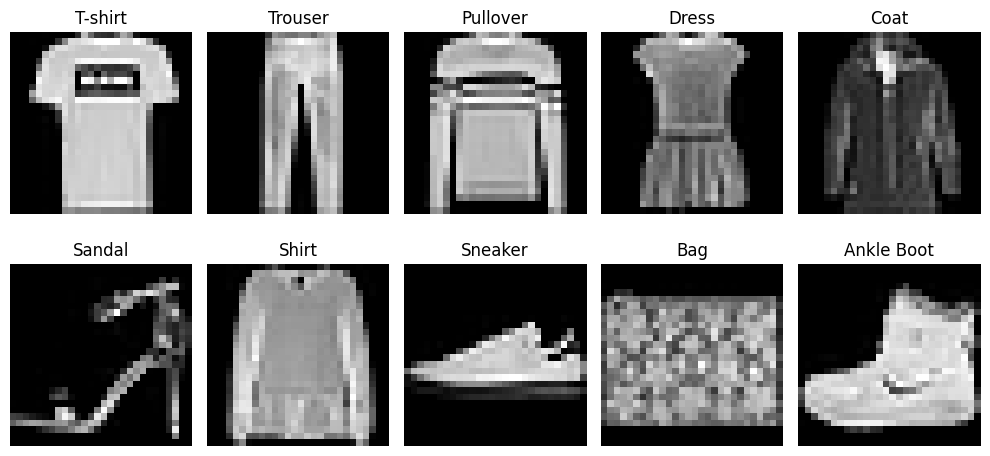

In [7]:

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for idx, ax in enumerate(axes.flat):
    ax.imshow(train_images[train_labels == idx][0].reshape(28, 28), cmap='gray')
    ax.set_title(categories[idx])
    ax.axis('off')
plt.tight_layout()


## Apply PCA for feature reduction

In [8]:

pca_model = PCA(n_components=2)
train_pca = pca_model.fit_transform(train_images)

## Apply LDA for supervised dimensionality reduction

In [9]:

lda_model = LDA(n_components=2)
train_lda = lda_model.fit_transform(train_images, train_labels)

## # Display PCA visualization with a different color palette

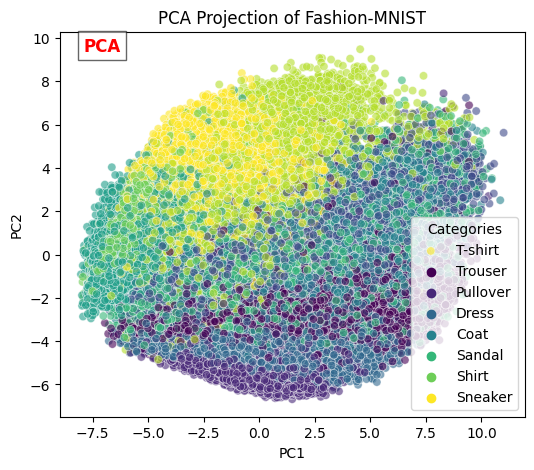

In [13]:

plt.figure(figsize=(6, 5))
sns.scatterplot(x=train_pca[:, 0], y=train_pca[:, 1], hue=train_labels, palette='viridis', alpha=0.6)
plt.title('PCA Projection of Fashion-MNIST')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title="Categories", labels=categories, loc='best')
plt.text(0.05, 0.95, 'PCA', transform=plt.gca().transAxes, fontsize=12, fontweight='bold', color='red', bbox=dict(facecolor='white', alpha=0.6))
plt.show()



## Display LDA visualization with a different color palette

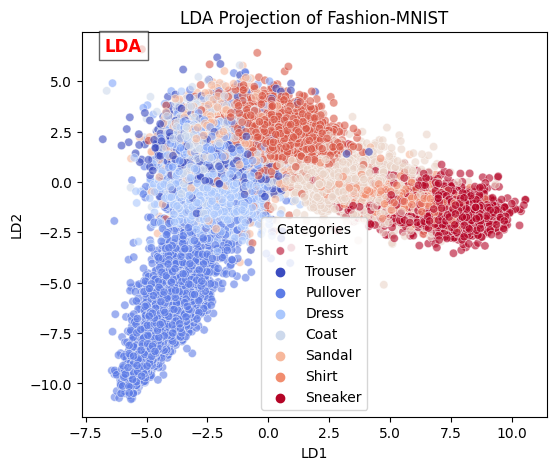

In [11]:


plt.figure(figsize=(6, 5))
sns.scatterplot(x=train_lda[:, 0], y=train_lda[:, 1], hue=train_labels, palette='coolwarm', alpha=0.6)
plt.title('LDA Projection of Fashion-MNIST')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(title="Categories", labels=categories, loc='best')
plt.text(0.05, 0.95, 'LDA', transform=plt.gca().transAxes, fontsize=12, fontweight='bold', color='red', bbox=dict(facecolor='white', alpha=0.6))

plt.show()
